In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [5]:
#sql užklausa per pandas sql_query
sql="""with T1
as (select  *, row_number() over (partition by id) as rc from autopliuslt)
select gamintojas, rida, price as kaina,
pagaminimo_data as data,
pavaros, variklis
from T1
where rc = 1 and rida != 'Nenurodyta' order by gamintojas"""
df = pd.read_sql_query(sql, con=DB)
df.head(2)

,gamintojas,rida,kaina,data,pavaros,variklis
0,Alfa Romeo,305 000 km,2 100,2007-01,Mechaninė,"1910 cm³, 150 AG (110kW)"
1,Alfa Romeo,308 615 km,4 900,2006-04,Mechaninė,"2387 cm³, 200 AG (147kW)"


In [8]:
df['R'] = df['rida'].apply(lambda s: float(s.replace(' ','').replace('km','')))
df['K'] = df['kaina'].apply(lambda s: float(s.replace(' ','').replace('km','')))
df['amžius'] = df['data'].apply(lambda s: 2024-int(s[:4]))
df.head()

,gamintojas,rida,kaina,data,pavaros,variklis,R,K,amžius
0,Alfa Romeo,305 000 km,2 100,2007-01,Mechaninė,"1910 cm³, 150 AG (110kW)",305000.0,2100.0,17
1,Alfa Romeo,308 615 km,4 900,2006-04,Mechaninė,"2387 cm³, 200 AG (147kW)",308615.0,4900.0,18
2,Aston Martin,45 000 km,125 000,2015-10,Automatinė,"5935 cm³, 517 AG (380kW)",45000.0,125000.0,9
3,Audi,112 000 km,25 000,2016-06,Automatinė,"3000 cm³, 333 AG (245kW)",112000.0,25000.0,8
4,Audi,450 000 km,7 800,2001-12,Automatinė,"4200 cm³, 360 AG (265kW)",450000.0,7800.0,23


In [9]:
df['R5000'] = df['R'].apply(lambda r: np.ceil(r/5000)*5000)
df.head()

,gamintojas,rida,kaina,data,pavaros,variklis,R,K,amžius,R5000
0,Alfa Romeo,305 000 km,2 100,2007-01,Mechaninė,"1910 cm³, 150 AG (110kW)",305000.0,2100.0,17,305000.0
1,Alfa Romeo,308 615 km,4 900,2006-04,Mechaninė,"2387 cm³, 200 AG (147kW)",308615.0,4900.0,18,310000.0
2,Aston Martin,45 000 km,125 000,2015-10,Automatinė,"5935 cm³, 517 AG (380kW)",45000.0,125000.0,9,45000.0
3,Audi,112 000 km,25 000,2016-06,Automatinė,"3000 cm³, 333 AG (245kW)",112000.0,25000.0,8,115000.0
4,Audi,450 000 km,7 800,2001-12,Automatinė,"4200 cm³, 360 AG (265kW)",450000.0,7800.0,23,450000.0


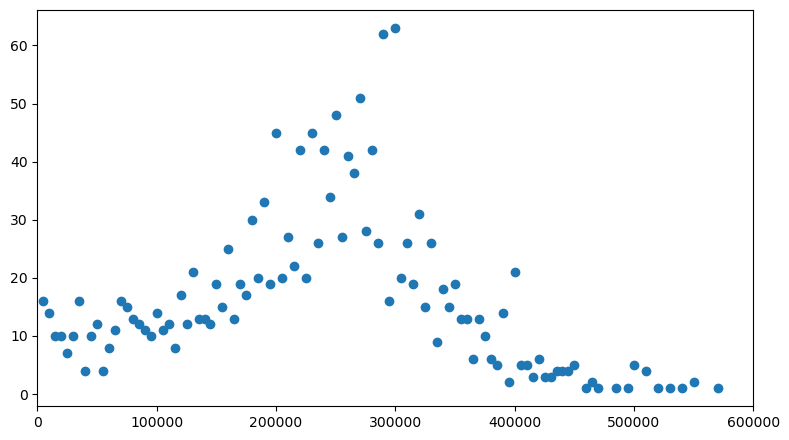

In [31]:
#  groupby(), agregacijos (mean, median), reset_index()
#  head() su groupby()

dfg = df[['R5000','K']].groupby('R5000').count().reset_index()

dfg.head()
fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:

axis.scatter(dfg['R5000'], dfg['K'])
axis.set_xlim(0, 6e5)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [32]:
dfg = df[['R5000','K']].groupby('R5000').mean(numeric_only=True).reset_index()

dfg.head()

,R5000,K
0,5000.0,27957.187500
1,10000.0,30702.857143
2,15000.0,23330.800000
3,20000.0,35309.000000
4,25000.0,51850.000000


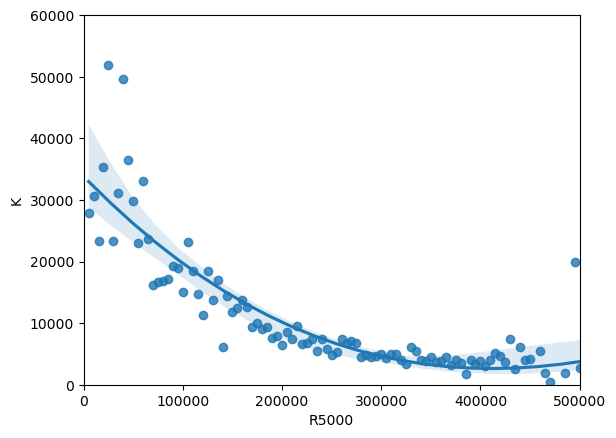

In [39]:
#  seaborn regplot()


axis = sns.regplot(data=dfg, x='R5000', y='K', order=3)
axis.set_xlim(0, 5e5)
axis.set_ylim(0, 6e4)
plt.show()